Projeto: Recomendações de filmes de animações e programas de TV.

Objetivo: Abordar algumas recomendações, técnicas usadas e verificar a quantidade de empresas.

Descrição das colunas:

-ID: identificador único

-Título: nome 

-Episódios: quantidade 

-Ano: ano

-Canal Original: canal original

-Empresa Americana: nomes das empresas

-Nota: origem da produção

-Técnica: técnica usada

-IMDb: pontuação

-Usuários do Google: pontuação do usuário google

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Abrir a base de dados
df=pd.read_csv('C:\\Users\\Usuário\\Downloads\\portifolio\\archive (2)\\Animated_Tv_Series.csv',sep=',', encoding='latin-1')
df.head(3)

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,NaN,Traditional,7.2,91%
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,NaN,CGI,6.5,91%
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,NaN,Traditional,8.0,87%


In [263]:
# Todas das colunas
df.columns

Index(['Id', 'Title', 'Episodes', 'Year', 'Original channel',
       'American company', 'Note', 'Technique', 'IMDb', 'Google users'],
      dtype='object')

In [3]:
# Renomeando as colunas
df.columns=['ID', 'Título', 'Episódios', 'Ano', 'Canal Original',
       'Empresa Americana', 'Nota', 'Técnica', 'IMDb', 'Usuários do Google']
df.columns

Index(['ID', 'Título', 'Episódios', 'Ano', 'Canal Original',
       'Empresa Americana', 'Nota', 'Técnica', 'IMDb', 'Usuários do Google'],
      dtype='object')

In [265]:
# Números de linhas e colunas
df.shape

(1816, 10)

In [4]:
# Verificando duplicatas
df.drop_duplicates().count()

ID                    1816
Título                1816
Episódios             1798
Ano                   1816
Canal Original        1809
Empresa Americana     1771
Nota                   488
Técnica               1816
IMDb                  1812
Usuários do Google    1812
dtype: int64

In [5]:
# Salvando a base sem duplicatas
df.drop_duplicates(inplace=True)

In [6]:
# Verificar dados ausentes
df.isnull().sum()

ID                       0
Título                   0
Episódios               18
Ano                      0
Canal Original           7
Empresa Americana       45
Nota                  1328
Técnica                  0
IMDb                     4
Usuários do Google       4
dtype: int64

Completar dados ausentes

In [7]:
df['Episódios'] = df['Episódios'].fillna(0)

In [8]:
df['Canal Original'] = df['Canal Original'].fillna(0)

In [9]:
df['Empresa Americana'] = df['Empresa Americana'].fillna(0)

In [10]:
df['Nota'] = df['Nota'].fillna(0)

In [11]:
df['IMDb'] = df['IMDb'].fillna(0)

In [12]:
df['Usuários do Google'] = df['Usuários do Google'].fillna(0)

Começar as análises

In [13]:
# Verificando valores únicos coluna 'Usuários do Google'
df['Usuários do Google'].unique()

array(['91%', '87%', '77%', '92%', '85%', '72%', '83%', '86%', '76%',
       '57%', '60%', '78%', '66%', '81%', '54%', '93%', '95%', '82%',
       '88%', '94%', '73%', '64%', '89%', '80%', '55%', '25%', '74%',
       '79%', '69%', '62%', '90%', '84%', '61%', '39%', '65%', '59%',
       '70%', '68%', '96%', '53%', '71%', '41%', '44%', '75%', '52%',
       '46%', '56%', '58%', '98%', '67%', '10%', '48%', 0, '42%', '49%',
       '63%', '50%', '34%', '45%', '36%', '97%', '26%', '9%', '47%',
       '12%', '51%', '31%', '33%', '37%', '32%', '35%', '24%', '21%',
       '14%', '38%', '16%', '43%', '11%', '100%'], dtype=object)

In [14]:
# Converte todos os valores da coluna 'Usuários do Google' para string
df['Usuários do Google'] = df['Usuários do Google'].astype(str)

# Remove o símbolo '%' e converte para float, tratando os valores NaN
df['Usuários do Google'] = df['Usuários do Google'].str.replace('%', '').astype(float)

# Converte os valores para inteiros
df['Usuários do Google'] = df['Usuários do Google'].astype(int)

# Classifique a série por valores (porcentagens) em ordem decrescente
contagem_ordenada = df['Usuários do Google'].sort_values(ascending=False)

# Mostrar resultado
pd.set_option('display.max_rows', None)
contagem_ordenada.head(10)

1768    100
227      98
495      98
1002     98
994      98
432      98
189      98
1695     97
598      97
683      97
Name: Usuários do Google, dtype: int32

In [15]:
# Importação de bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

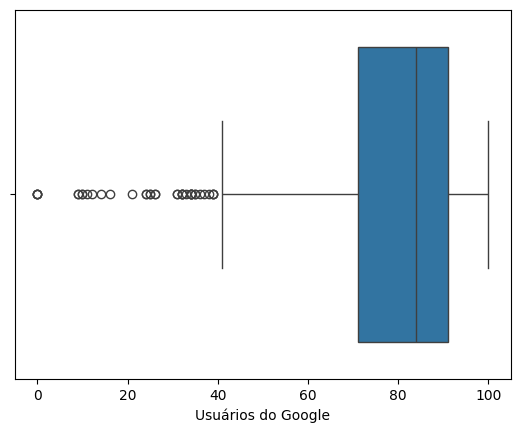

In [16]:
# Identificando outliers
sns.boxplot(x=df['Usuários do Google']);

In [17]:
# Ordeando 
ordenar=df['Usuários do Google'].unique()
ordenar.sort()
ordenar

array([  0,   9,  10,  11,  12,  14,  16,  21,  24,  25,  26,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
       100])

In [18]:
# Classifique a série por valores em ordem decrescente
contagem_ordenada = df['Usuários do Google'].sort_values(ascending=False)

print(f'{"Recomendação pelo Usuário do Google":-^50}')
print()
for i, index in enumerate(contagem_ordenada.head(10).index, 1): # Loop nos valores maiores
    nome = df.loc[index, 'Título']  
    print(f"{i}. {nome}, Porcentagem: {contagem_ordenada[index]}%")

-------Recomendação pelo Usuário do Google--------

1. The Wonderful Stories of Professor Kitzel, Porcentagem: 100%
2. Bee and PuppyCat: Lazy in Space, Porcentagem: 98%
3. Epithet Erased, Porcentagem: 98%
4. Misterjaw, Porcentagem: 98%
5. Mina and the Count, Porcentagem: 98%
6. Downtown, Porcentagem: 98%
7. Braingames, Porcentagem: 98%
8. Visionaries: Knights of the Magical Light, Porcentagem: 97%
9. Gary & Mike, Porcentagem: 97%
10. Helluva Boss, Porcentagem: 97%


In [19]:
# Verificar valores únicos
df['Ano'].unique()

array(['1993-1995', '2000-2008', '2002-2003', '2018-2019', '2008-2010',
       '2014-2016', '2005-2020', '1985', '1997-1998', '1994-1997',
       '2009-2012', '2015', '1972-1973', '1967-1968', '2022-2023',
       '2001-2002', '1995-1996', '2021-present', '1973', '1992-1993',
       '2013-2015', '2010-2018', '2020-2021', '2023-present', '1996-2000',
       '1968-1969', '2006', '2001', '2002-2006', '2018', '2004-2005',
       '2015-2016', '1950', '1956-1957', '2015-2018', '1988', '1959-1964',
       '1992-1996', '1958-1961', '1966-1968', '1985-1991', '1991-1995',
       '2023', '2022', '1994-1995', '1988-1989', '1987-1989',
       '2022-present', '2019', '1996-1998', '2003-2008', '2014-2017',
       '1978-1983', '1993', '1977-1978', '2011', '1983-1990', '1961-1962',
       '1972', '2005-present', '2005-2007', '2019-2022', '1997-2001',
       '2016-2018', '1993-1998', '2020-2023', '2017', '2018-2021',
       '2000-present', '1967-1970', '2021', '2009-2023', '2019-2021',
       '1971-1973'

In [20]:
# Remover expressão '-present'
df['Ano'] = df['Ano'].str.replace('-present', '')


In [21]:
# Copiando df para preservando o original
df_copia = df.copy()

In [22]:
# Transformar tipo do 'Ano' para numérico
convertendo=df_copia['Ano']=pd.to_numeric(df_copia['Ano'], errors='coerce')

print(f'{"Recomendação apartir do ano 2000 com 70% de aprovação":-^70}')

# Filtro de filmes ou serie apartir de 2000 com mais de 70% de aceitação
convertendo=df_copia[(df_copia['Ano'] >= 2000) & (df_copia['Usuários do Google'] >= 70)]['Título']
convertendo2=convertendo.head(10).to_string(index=False)

for i in convertendo2.split('\n'):
    print(i.lstrip())

--------Recomendação apartir do ano 2000 com 70% de aprovação---------
Adventure Time: Fionna and Cake
The Adventures of Chico and Guapo
The Adventures of Kid Danger
Agent Elvis
Alabama Jackson
Alien: Isolation - The Digital Series
Alien News Desk
American Dad!
Apollo Gauntlet
Aqua Teen Hunger Force


In [23]:
# Ordenar ano
anos = sorted(df['Ano'])
print(anos)

['1949-1950', '1949-1952', '1950', '1950-1959', '1950-1964', '1953-1955', '1953-1957, 1969-1973', '1955-1967', '1956', '1956-1957', '1957-1959', '1957-1960', '1957-1960', '1957-1977', '1958-1960', '1958-1961', '1958-1961', '1958-1961', '1958-1962', '1959', '1959-1960', '1959-1960', '1959-1960', '1959-1960', '1959-1961', '1959-1961', '1959-1961', '1959-1962', '1959-1964', '1960', '1960-1961', '1960-1961', '1960-1961', '1960-1962', '1960-1962', '1960-1963', '1960-1963', '1960-1964', '1960-1966', '1960-2000', '1961', '1961', '1961-1962', '1961-1962', '1961-1962', '1961-1962', '1961-1962, 1964-1965', '1961-1973', '1962-1963', '1962-1963', '1962-1963', '1962-1963', '1962-1963, 1985-1987', '1962-1964', '1963', '1963', '1963-1964', '1963-1965', '1963-1966', '1963-1966', '1964', '1964-1965', '1964-1965', '1964-1966', '1964-1966', '1964-1966', '1964-1966', '1964-1967', '1964-1967', '1964-1967', '1964-1967', '1964-1967', '1964-1969', '1965', '1965-1966', '1965-1966', '1965-1966', '1965-1966', '1

In [24]:
# Mais antigo
menor_ano = min(anos)
print("Mais antigo:", menor_ano)
print()
titulo=df.query("Ano == '1949-1950'")['Título'].to_string(index=False)
print(f'Título: {titulo}')


Mais antigo: 1949-1950

Título: Jim and Judy in Teleland


In [25]:
# Ano mais recente 
maior_ano = max(anos)
print("Ano mais recente:", maior_ano)

Ano mais recente: 2024


In [26]:
# Quantidade de Títulos mais recentes
count_maior = anos.count('2024')
print("Número de ocorrências de '2024':", count_maior)
print("\n" + f'{"Títulos":-^30}')
titulo2=df.query('Ano == "2024"')['Título'].to_string(index=False)
for titulo in titulo2.split('\n'):
    print(titulo.lstrip())

Número de ocorrências de '2024': 10

-----------Títulos------------
Dee & Friends in Oz
Grimsburg
Hazbin Hotel
Hot Wheels Let's Race
In the Know
Lyla in the Loop
Megamind Rules!
RoboGobo
Rock, Paper, Scissors
The Second Best Hospital in the Galaxy


In [27]:
# Técnicas usadas
tecnica = df['Técnica'].unique() # Valores únicos
total_tecnica = len(tecnica) # Contagem

print("Valores únicos da coluna 'Técnica':")
for i, valor in enumerate(tecnica, 1): # Loop em cada técnica
    print(f"{i}. {valor}")

print(f"\nTotal de tecnicas: {total_tecnica}") # Resposta

Valores únicos da coluna 'Técnica':
1. Traditional
2. CGI
3. Flash
4. Stop-Motion
5. Traditional/Live-Action
6. CGI/Flash/Stop-Motion/Live-Action
7. Flash/Live-Action
8. CGI/Flash/Stop-motion/Traditional
9. Traditional (Seasons 1-15, 20-25)
Cel (Seasons 1-3)
Digital ink-and-paint (Seasons 4-15, 20-25)
Flash (Seasons 16-25)
Adobe Flash (Seasons 16-19)
Toon Boom Harmony (Seasons 20-25)
10. Traditional/Live-Action/Flash/CGI
11. CGI/Live-Action
12. Traditional (season 1)/Flash (season 2-3)
13. Flash/Traditional/CGI
14. Traditional/Stop-Motion/CGI/Flash
15. Traditional (season 1)/Flash (season 2)
16. Traditional/Digital ink-and-paint (seasons 1-5)/Flash/Adobe Flash (season 6-present)
17. Flash/Traditional
18. Traditional (seasons 1-9)/Flash (season 10)
19. Stop-motion
20. Flash/Live-action
21. Traditional/Live-action
22. Live-Action/Traditional
23. Live-Action/Flash
24. CGI/Flash/Live-action
25. CGI/Live-action
26. Traditional/Digital ink-and-paint (season 1)/Flash/Adobe Flash (seasons 2-6)

In [28]:
# Escolhendo um tipo de técnica
import re

descricoes = [
    'Traditional',
    'CGI',
    'Flash',
    'Stop-Motion',
    'Traditional/Live-Action',
    'CGI/Flash/Stop-Motion/Live-Action',
    'Flash/Live-Action',
    'CGI/Flash/Stop-motion/Traditional',
    'Traditional (Seasons 1-15, 20-25)',
    'Cel (Seasons 1-3)',
    'Digital ink-and-paint (Seasons 4-15, 20-25)',
    'Flash (Seasons 16-25)',
    'Adobe Flash (Seasons 16-19)',
    'Toon Boom Harmony (Seasons 20-25)',
    'Traditional/Live-Action/Flash/CGI',
    'CGI/Live-Action',
    'Traditional (season 1)/Flash (season 2-3)',
    'Flash/Traditional/CGI',
    'Traditional/Stop-Motion/CGI/Flash',
    'Traditional (season 1)/Flash (season 2)',
    'Traditional/Digital ink-and-paint (seasons 1-5)/Flash/Adobe Flash (season 6-present)',
    'Flash/Traditional',
    'Traditional (seasons 1-9)/Flash (season 10)',
    'Stop-motion',
    'Flash/Live-action',
    'Traditional/Live-action',
    'Live-Action/Traditional',
    'Live-Action/Flash',
    'CGI/Flash/Live-action',
    'CGI/Live-action',
    'Traditional/Digital ink-and-paint (season 1)/Flash/Adobe Flash (seasons 2-6)',
    'Traditional/CGI',
    'Traditional/Flash',
    'Traditional/CGI/Stop-Motion',
    'Traditional/CGI/Stop-Motion/Live-Action',
    'Stop-Motion/Live-Action',
    'Stop-Motion/CGI/Flash',
    'Flash/Live action',
    'Traditional/Flash/CGI/Stop-Motion',
    'CGI/Flash',
    'CGI/Traditional/Flash',
    'CGI/Flash/Stop-Motion/Traditional/Live-action',
    'CGI/Stop-Motion/Flash/Traditional',
    'Flash/Live-Action/Traditional/CGI',
    'Flash/Traditional/Live-Action',
    'Stop-motion/Live-action'
]

# Encontrar o padrão que contêm "Season" ou "Seasons"
padrao = re.compile(r'(Seasons?)', re.IGNORECASE)

# Filtrar as descrições que correspondem ao padrão
descricoes_com_season = filter(lambda descricao: padrao.search(descricao), descricoes)

# Imprimir
titulo=df['Título']
print(f'{"Técnica: Temporadas":-^50}')
for i, (descricao, titulo) in enumerate(zip(descricoes_com_season, titulo), 1):
    print(f"{i}- {titulo}: {descricao}")


---------------Técnica: Temporadas----------------
1- 2 Stupid Dogs: Traditional (Seasons 1-15, 20-25)
2- 3-2-1 Penguins!: Cel (Seasons 1-3)
3- 3-South: Digital ink-and-paint (Seasons 4-15, 20-25)
4- 3Below: Tales of Arcadia: Flash (Seasons 16-25)
5- 3rd & Bird: Adobe Flash (Seasons 16-19)
6- The 7D: Toon Boom Harmony (Seasons 20-25)
7- 12 oz. Mouse: Traditional (season 1)/Flash (season 2-3)
8- The 13 Ghosts of Scooby-Doo: Traditional (season 1)/Flash (season 2)
9- 101 Dalmatians: The Series: Traditional/Digital ink-and-paint (seasons 1-5)/Flash/Adobe Flash (season 6-present)
10- Aaahh!!! Real Monsters: Traditional (seasons 1-9)/Flash (season 10)
11- Abby's Flying Fairy School: Traditional/Digital ink-and-paint (season 1)/Flash/Adobe Flash (seasons 2-6)


In [29]:
# Ordenar coluna 'IMDb'
ordenar =df ['IMDb'].unique()
ordenar.sort()
ordenar

array([0. , 1.5, 1.6, 1.7, 1.9, 2. , 2.1, 2.2, 2.3, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.3])

In [30]:
# Média 'IMDb
media=df['IMDb'].mean()
media.round(2)

6.7

In [31]:
# Filtro de filmes ou serie apartir de 2000 com pontuação 6.7
print(f'{"Títulos com pontuação do IMDb":-^50}')
convertendo=df_copia[(df_copia['Ano'] >= 2000) & (df_copia['IMDb'] >= 6.7 )]['Título']
convertendo2=convertendo.head(10).to_string(index=False)
convertendo2
for i in convertendo2.split('\n'):
    print(i.lstrip())

----------Títulos com pontuação do IMDb-----------
Adventure Time: Fionna and Cake
Agent Elvis
Alabama Jackson
American Dad!
Aqua Teen Hunger Force
Aquadonk Side Pieces
Alma's Way
The Amazing World of Gumball
Arcane
Baman Piderman


In [32]:
# Ordenar em forma decrescente 
contagem_ordenada = df['IMDb'].sort_values(ascending=False)

print(f'{"Recomendação por pontuação IMDb":-^50}')
print()
for i, index in enumerate(contagem_ordenada.head(10).index, 1): # Loop nos maiores pontuação
    nome = df.loc[index, 'Título']  
    print(f"{i}. {nome}, Porcentagem: {contagem_ordenada[index]}") # Resultado

---------Recomendação por pontuação IMDb----------

1. Avatar: The Last Airbender, Porcentagem: 9.3
2. Jelly, Ben, & Pogo, Porcentagem: 9.3
3. Rick and Morty, Porcentagem: 9.1
4. Office Ladies: The Animated Series, Porcentagem: 9.1
5. Open Season: Call of Nature, Porcentagem: 9.0
6. Batman: The Animated Series, Porcentagem: 9.0
7. Arcane, Porcentagem: 9.0
8. Face's Music Party, Porcentagem: 8.9
9. Adventure Time: Fionna and Cake, Porcentagem: 8.9
10. Saving Me, Porcentagem: 8.9


In [ ]:
# Total de empresas
df['Empresa Americana'] = df[df['Empresa Americana'] != 0]['Empresa Americana']
total_empresas= df['Empresa Americana'].nunique()
total_empresas

505


In [47]:
# Empresas que aparecem mais que uma vez
print(f'{"Empresas e a quantidade de frequência":-^50}')
print()

# Contar a frequência de cada empresa
empresas = df['Empresa Americana'].value_counts()

# Filtrar empresas com mais de 1 ocorrência e que são diferentes de 0
empresas_maior_que_1 = empresas[(empresas > 1) & (empresas.index != 0)]
print(empresas_maior_que_1)

------Empresas e a quantidade de frequência-------

Empresa Americana
Hanna-Barbera                                                  189
DIC Entertainment                                               71
Warner Bros. Animation                                          61
Nickelodeon Animation Studio                                    57
Cartoon Network Studios                                         54
Disney Television Animation                                     52
DreamWorks Animation Television                                 47
Filmation                                                       42
Walt Disney Television Animation                                41
Williams Street                                                 36
Netflix Animation                                               25
Saban Entertainment                                             24
Ruby-Spears Enterprises                                         24
Titmouse, Inc.                                             